Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [ ]:
Working directory

In [2]:
import os
os.getcwd( )

'C:\\Users\\Administrator'

In [ ]:
Changing working directory

In [3]:

os.chdir('C:/Users/Administrator/Desktop/shoot')
os.getcwd( )

'C:\\Users\\Administrator\\Desktop\\shoot'

In [ ]:
Reading data using Pandas

In [4]:

df = pd.read_excel('Makert Prices 2022.xlsx')

In [5]:
#first 5 rows
df.head()


,Dates,Seasons,Bull,Cow,Heifer,Steer
0,2009-08-01,Drought,8500.000000,966.666667,1666.666667,766.666667
1,2009-09-01,Drought,18000.000000,4000.000000,15000.000000,13000.000000
2,2009-10-01,Drought,8500.000000,5000.000000,8000.000000,9000.000000
3,2009-11-01,Drought,12484.312740,4815.021851,5198.550137,11302.715033
4,2009-12-01,Wet,22166.666667,9477.777778,10111.111111,18222.222222


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    154 non-null    datetime64[ns]
 1   Seasons  154 non-null    object        
 2   Bull     154 non-null    float64       
 3   Cow      154 non-null    float64       
 4   Heifer   154 non-null    float64       
 5   Steer    154 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 7.3+ KB


In [7]:
#data types
df.dtypes

Dates      datetime64[ns]
Seasons            object
Bull              float64
Cow               float64
Heifer            float64
Steer             float64
dtype: object

In [8]:
#checking for missing values
df.isnull() 

,Dates,Seasons,Bull,Cow,Heifer,Steer
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
149,False,False,False,False,False,False
150,False,False,False,False,False,False
151,False,False,False,False,False,False
152,False,False,False,False,False,False


In [9]:
from sklearn.model_selection import train_test_split
x = df.drop(['Bull','Cow','Heifer','Steer'], axis=1 ) 
y = df.drop(['Dates','Seasons'], axis=1)


In [10]:
x

,Dates,Seasons
0,2009-08-01,Drought
1,2009-09-01,Drought
2,2009-10-01,Drought
3,2009-11-01,Drought
4,2009-12-01,Wet
...,...,...
149,2022-01-01,dry
150,2022-03-10,dry
151,2022-04-15,dry
152,2022-05-20,dry


In [11]:
y

,Bull,Cow,Heifer,Steer
0,8500.000000,966.666667,1666.666667,766.666667
1,18000.000000,4000.000000,15000.000000,13000.000000
2,8500.000000,5000.000000,8000.000000,9000.000000
3,12484.312740,4815.021851,5198.550137,11302.715033
4,22166.666667,9477.777778,10111.111111,18222.222222
...,...,...,...,...
149,69500.000000,35000.000000,27500.000000,65000.000000
150,65000.000000,33000.000000,21500.000000,57500.000000
151,57500.000000,22500.000000,14500.000000,50000.000000
152,40000.000000,20000.000000,10000.000000,30000.000000


Hyper Parameter tuning, testing data 0.2, training data= 0.8

In [12]:
x_train,x_test,y_train, y_test=train_test_split (x,y, test_size=0.2)

In [13]:
train_data=x_train.join(y_train)

In [14]:
train_data


,Dates,Seasons,Bull,Cow,Heifer,Steer
53,2014-01-01,Wet,65000.000000,30000.000000,35000.000000,40000.000000
19,2011-03-01,Wet,53184.680635,34365.339265,29520.160828,53324.763720
10,2010-06-01,Dry,59204.209096,33537.113641,19108.717996,47141.187964
123,2019-11-01,drought,55097.701105,28422.446938,24423.480985,45569.983771
147,2021-11-01,dry,49365.230261,32044.134757,26492.227723,45091.639964
...,...,...,...,...,...,...
119,2019-07-01,drought,60314.355204,30250.461392,28364.014570,40763.480278
27,2011-11-01,Wet,41500.000000,25000.000000,19500.000000,40500.000000
112,2018-12-01,Wet,78000.000000,39000.000000,38000.000000,56000.000000
131,2020-07-01,dry,57937.308657,24732.817003,25692.952644,36564.007188


In [15]:
train_data['Bull']=np.log(train_data['Bull']+1)
train_data['Cow']=np.log(train_data['Cow']+1)
train_data['Heifer']=np.log(train_data['Heifer']+1)
train_data['Steer']=np.log(train_data['Steer']+1)

array([[<Axes: title={'center': 'Dates'}>,
        <Axes: title={'center': 'Bull'}>],
       [<Axes: title={'center': 'Cow'}>,
        <Axes: title={'center': 'Heifer'}>],
       [<Axes: title={'center': 'Steer'}>, <Axes: >]], dtype=object)

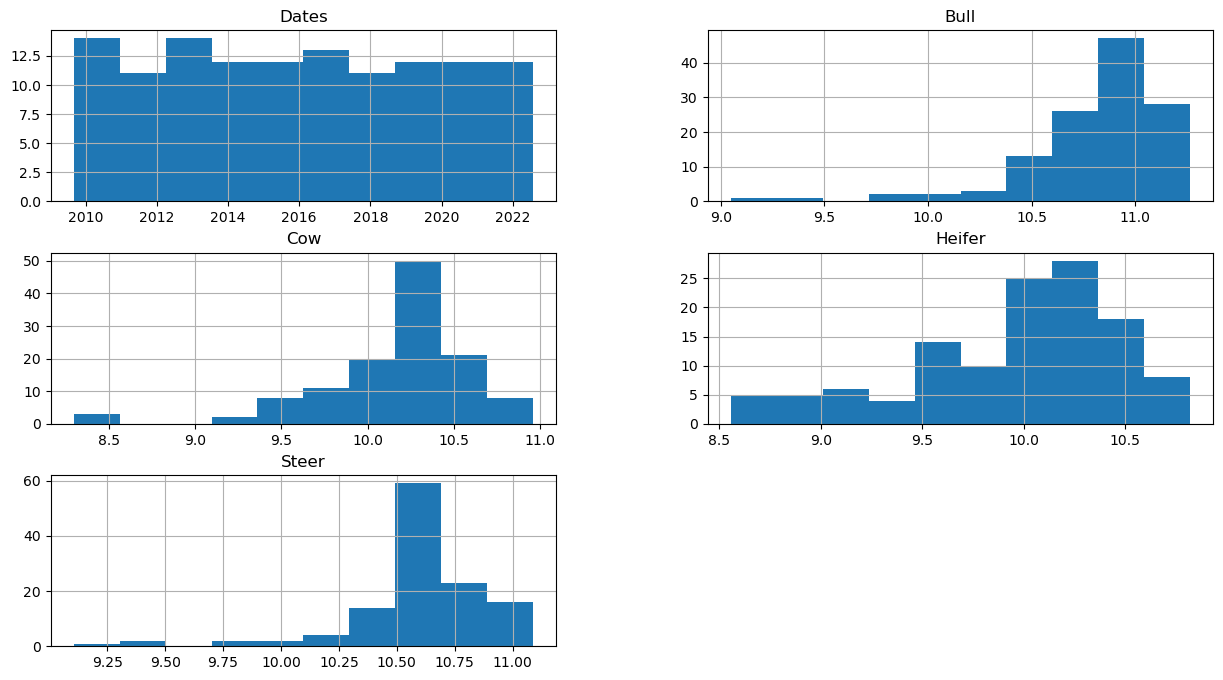

In [16]:
train_data.hist(figsize=(15,8))


One-Hot Encoding  to convert categorical data ta numerical values.

In [17]:
train_data.Seasons.value_counts()

Seasons
Wet        40
Dry        38
dry        19
Drought    11
drought    10
wet         5
Name: count, dtype: int64

In [18]:
train_data = train_data.join((pd.get_dummies(train_data.Seasons))).drop(['Seasons'],axis=1)
train_data["Drought"] = train_data["Drought"].astype(int)
train_data["drought"] = train_data["drought"].astype(int)
train_data["Wet"] = train_data["Wet"].astype(int)
train_data["wet"] = train_data["wet"].astype(int)
train_data["Dry"] = train_data["Dry"].astype(int)
train_data["dry"] = train_data["dry"].astype(int)

In [19]:
train_data

,Dates,Bull,Cow,Heifer,Steer,Drought,Dry,Wet,drought,dry,wet
53,2014-01-01,11.082158,10.308986,10.463132,10.596660,0,0,1,0,0,0
19,2011-03-01,10.881544,10.444833,10.292863,10.884175,0,0,1,0,0,0
10,2010-06-01,10.988765,10.420438,9.857952,10.760924,0,1,0,0,0,0
123,2019-11-01,10.916881,10.254970,10.103341,10.727026,0,0,0,1,0,0
147,2021-11-01,10.807022,10.374901,10.184644,10.716474,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
119,2019-07-01,11.007342,10.317300,10.252912,10.615566,0,0,0,1,0,0
27,2011-11-01,10.633473,10.126671,9.878221,10.609082,0,0,1,0,0,0
112,2018-12-01,11.264477,10.571343,10.545368,10.933125,0,0,1,0,0,0
131,2020-07-01,10.967134,10.115927,10.154011,10.506847,0,0,0,0,1,0


In [20]:
train_data.dtypes

Dates      datetime64[ns]
Bull              float64
Cow               float64
Heifer            float64
Steer             float64
Drought             int32
Dry                 int32
Wet                 int32
drought             int32
dry                 int32
wet                 int32
dtype: object

<Axes: >

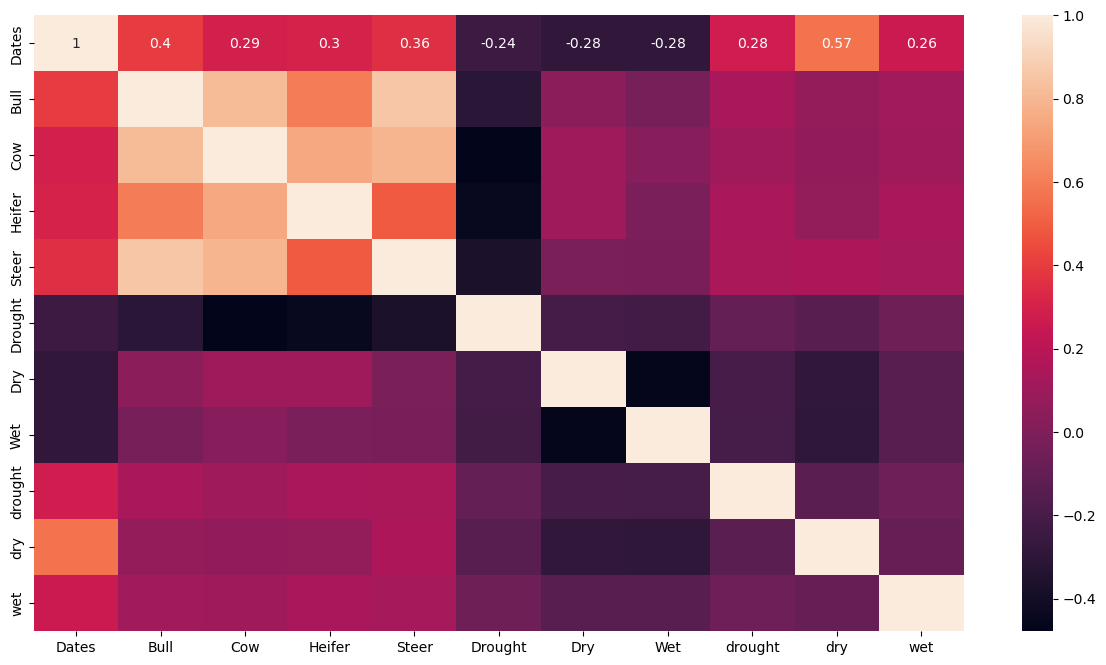

In [21]:
plt.figure(figsize=(15,8))
sn.heatmap(train_data.corr(),annot= True)

There is correlation between types of livestocks

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\utils.py:122: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = met

<Axes: xlabel='Dates', ylabel='Bull'>

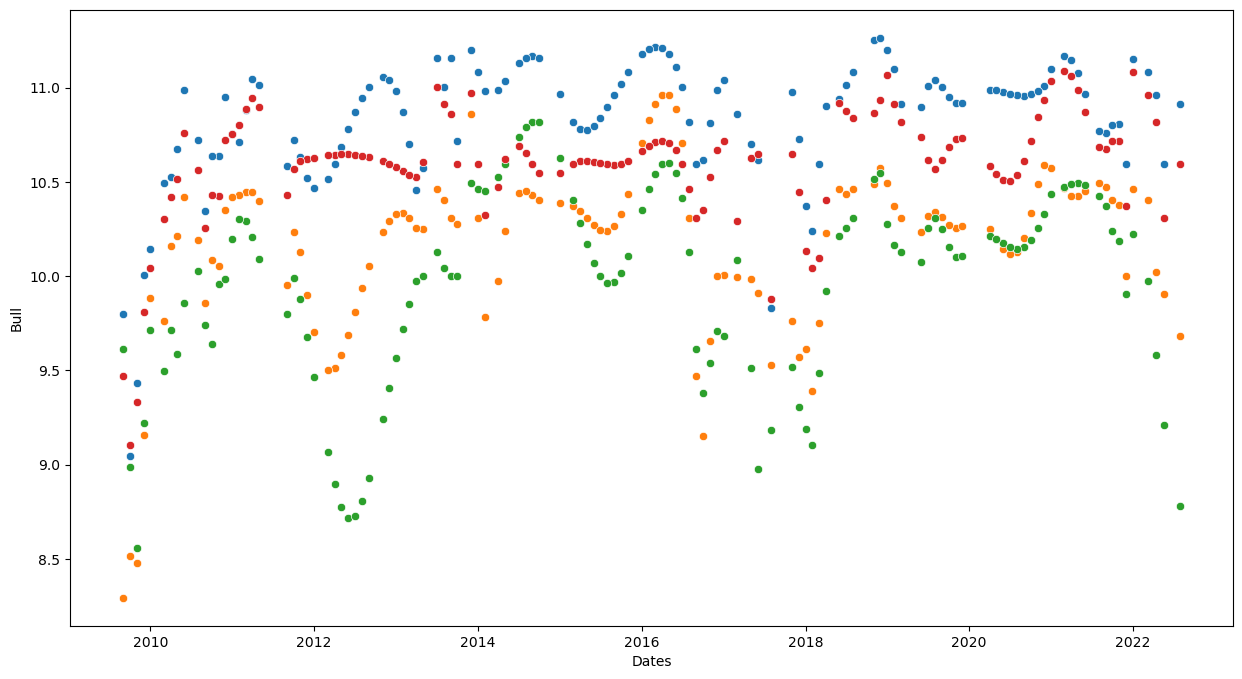

In [22]:
plt.figure(figsize=(15,8))
sn.scatterplot(x="Dates", y="Bull", data=train_data, cmap='b')
sn.scatterplot(x="Dates", y="Cow", data=train_data, cmap='g')
sn.scatterplot(x="Dates", y="Heifer", data=train_data, cmap='y')
sn.scatterplot(x="Dates", y="Steer", data=train_data, cmap='r')

Selling earlier is advantageous because we are uncertain about the future, because the prices fluctuate.
Selling bulls brings in more income than cows.
The best time period to sell livestock is in between 2010 to 1012, 2012 to 2016, 2018 to 2022 when the market prices are high.

<Axes: xlabel='Seasons'>

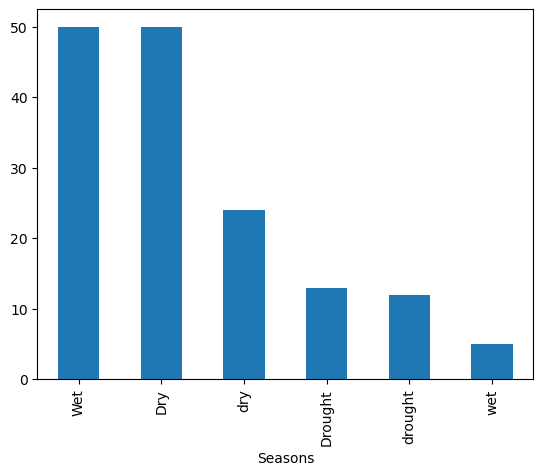

In [23]:
df['Seasons'].value_counts().plot(kind='bar')

There are more sales during Wet seasons than drought seasons.

In [24]:
x_train

,Dates,Seasons
53,2014-01-01,Wet
19,2011-03-01,Wet
10,2010-06-01,Dry
123,2019-11-01,drought
147,2021-11-01,dry
...,...,...
119,2019-07-01,drought
27,2011-11-01,Wet
112,2018-12-01,Wet
131,2020-07-01,dry


In [35]:
y_train
x1_train= train_data.drop(['Dates','Bull','Cow','Heifer','Steer'], axis=1 )

In [36]:
test_data=x_test.join(y_test)
test_data['Bull']=np.log(test_data['Bull']+1)
test_data['Cow']=np.log(test_data['Cow']+1)
test_data['Heifer']=np.log(test_data['Heifer']+1)
test_data['Steer']=np.log(test_data['Steer']+1)

test_data = test_data.join((pd.get_dummies(test_data.Seasons))).drop(['Seasons'],axis=1)

In [37]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(y_train, x1_train)

LinearRegression()

In [38]:
reg.score(y_train, x1_train)


0.06140189220671349

Linear regression model gived 6% perfomance

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(y_train, x1_train)


RandomForestRegressor()

In [40]:
forest.score(y_train, x1_train)

0.8846836631253345

Random forest regressor gives 88%. therefore the best model is Random Forest Regressor